In [1]:
import pyfastflow as pf
import matplotlib.pyplot as plt
import taichi as ti
ti.init(ti.gpu)

%matplotlib widget


[Taichi] version 1.7.2, llvm 15.0.4, commit 0131dce9, linux, python 3.11.10


[I 09/02/25 16:23:21.419 138908] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Taichi] Starting on arch=cuda


In [2]:
nx, ny = 512, 512

In [3]:
wnoise = pf.noise.white_noise(nx,ny)
rnoise = pf.noise.red_noise(nx,ny)
pnoise = pf.noise.perlin_noise(nx,ny, frequency = 5, octaves = 6, persistence = 0.4, amplitude = 1.)

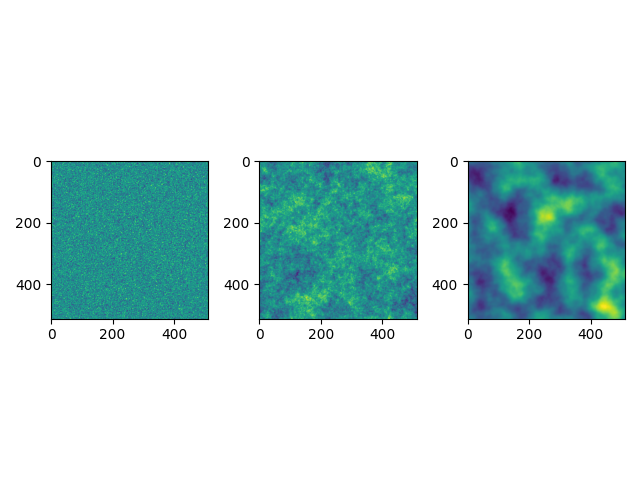

In [4]:
fig,ax = plt.subplots(1, 3)
ax[0].imshow(wnoise)
ax[1].imshow(rnoise)
ax[2].imshow(pnoise)

plt.tight_layout()

In [5]:
?pf.noise.white_noise
?pf.noise.red_noise
?pf.noise.perlin_noise

Signature:
pf.noise.perlin_noise(
    nx: int,
    ny: int,
    frequency: float = 8.0,
    octaves: int = 4,
    persistence: float = 0.5,
    amplitude: float = 1.0,
    seed: int = 42,
    return_field: bool = False,
)
Docstring:
Generate Perlin noise with multiple octaves using proper permutation tables.

Creates coherent noise with natural-looking patterns by combining multiple
scales of noise. Uses proper permutation tables and gradient vectors for
artifact-free, deterministic results suitable for procedural terrain generation.

Args:
    nx: Number of cells in x direction
    ny: Number of cells in y direction
    frequency: Base frequency of noise patterns (default: 8.0)
              Higher values create more detailed, smaller-scale features
    octaves: Number of noise layers to combine (default: 4)
            More octaves add finer detail at computational cost
    persistence: Amplitude ratio between octaves (default: 0.5)
                Controls how much each octave contr